## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import required libraries
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace

#### Link to use relative path to input data set based on your directory structure:
https://stackoverflow.com/questions/50119792/python-import-excel-file-using-relative-path

In [3]:
#Read the csv into dataframe and check/inspect its first 5 rows and get feel of data
df = pd.read_csv(r'./../data/raw/day.csv')
df_orig=df
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Inspect number of rows and columns in the dataframe
df.shape

(730, 16)

In [5]:
#Inspect whether we have null values in the dataframe, Datatype of columns(variables) etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Inspecting mean, median, count, specific percentiles of numerical variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Analyse data and convert required numeric variables to categorical variables for further analysis

After analysing all variables we choose below variables to convert from numerical to categorical:
1. season
2. mnth
3. weathersit

In [7]:
#Inspecting different unique values before converting to categorical variables
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [9]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [10]:
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [11]:
#Method to convert numerical to categorical for 'season' variable
def getSeason(val):
    if val==1:
        return "spring"
    elif (val==2):
        return "summer"
    elif (val==3):
        return "fall"
    elif (val==4):
        return "winter"
    else:
        return "none_season"

In [12]:
df['season']=df.season.apply(getSeason)

In [13]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
# Defining the dictionary map to convert 'mnth' numerical to categorical variable:

getmnth_map={ 1: "January", 
                  2: "February", 
                  3: "March", 
                  4: "April",
                  5: "May",
                  6: "June",
                  7: "July",
                  8: "August",
                  9: "September",
                  10: "October",
                  11: "November",
                  12: "December"}

In [15]:
df['mnth'] = df['mnth'].replace(getmnth_map)

In [16]:
df.mnth.value_counts()

July         62
December     62
January      62
August       62
May          62
March        62
October      62
June         60
September    60
April        60
November     60
February     56
Name: mnth, dtype: int64

In [17]:
#confirming wether the datatype of respective variable(mnth) has been converted from 'int' to 'object'
df.mnth.dtype

dtype('O')

In [18]:
# Defining the dictionary map to convert 'weathersit' numerical to categorical variable:

getweathersit_map={ 1: "Clear", 
                  2: "Misty+Cloudy", 
                  3: "LightSnowRainThunderstorm", 
                  4: "HeavySnowRainThunderstorm"}

In [19]:
df['weathersit'] = df['weathersit'].replace(getweathersit_map)

In [20]:
df.weathersit.value_counts()

Clear                        463
Misty+Cloudy                 246
LightSnowRainThunderstorm     21
Name: weathersit, dtype: int64

In [21]:
#confirming wether the datatype of respective variable(weathersit) has been converted from 'int' to 'object'
df.weathersit.dtype

dtype('O')

In [22]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,1,1,Misty+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,2,1,Misty+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
# Defining the dictionary map to convert 'workingday' numerical to another numerical variable nonworkingday for analytics ease:

getnonworkingday_map={ 1: 0, 
                  0: 1}

In [24]:
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [25]:
df['nonworkingday'] = df['workingday'].replace(getnonworkingday_map)

In [26]:
df.nonworkingday.value_counts()

0    504
1    226
Name: nonworkingday, dtype: int64

In [27]:
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [28]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,nonworkingday
0,1,01-01-2018,spring,0,January,0,1,1,Misty+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,spring,0,January,0,2,1,Misty+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,3,03-01-2018,spring,0,January,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,4,04-01-2018,spring,0,January,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,5,05-01-2018,spring,0,January,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


## Step 2: Visualising the Data

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [30]:
# sns.pairplot(df)
# plt.show()

In [31]:
df.corr()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,nonworkingday
instant,1.000000,0.866026,0.016275,-0.001182,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896,0.015171
yr,0.866026,1.000000,0.008195,0.000685,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,0.011852
holiday,0.016275,0.008195,1.000000,-0.020145,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,0.257009
weekday,-0.001182,0.000685,-0.020145,1.000000,0.001588,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183,-0.001588
workingday,-0.015171,-0.011852,-0.257009,0.001588,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640,-1.000000
temp,0.150738,0.048789,-0.028764,0.044876,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,-0.002044
atemp,0.152773,0.047215,-0.032703,0.037964,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,-0.010657
hum,0.016080,-0.112547,-0.015662,0.008780,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.053770
windspeed,-0.112667,-0.011624,0.006257,-0.017230,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,0.002453
casual,0.275604,0.250502,0.054055,-0.350848,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,0.090369


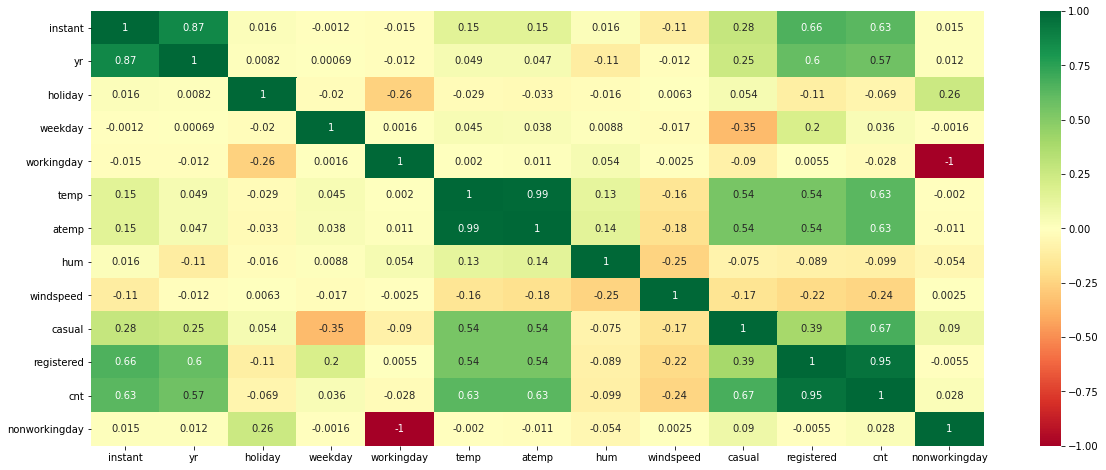

In [32]:
#corr() works only for numerical variables, further down we will convert all categorical also to numerical by using concept of
#dummy variables for machine learning purposes
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.show()

#### Visualising Categorical Variables

There are a few categorical variables as well.To get an intuition of data, let's make a boxplot for some of these variables.

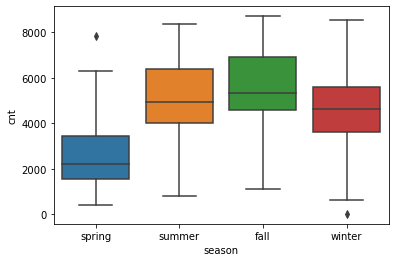

In [33]:
#'Season' Category
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.show()

#### Inference: You can see increased activity using bikes in 'summer'and 'fall', the least is in 'spring'

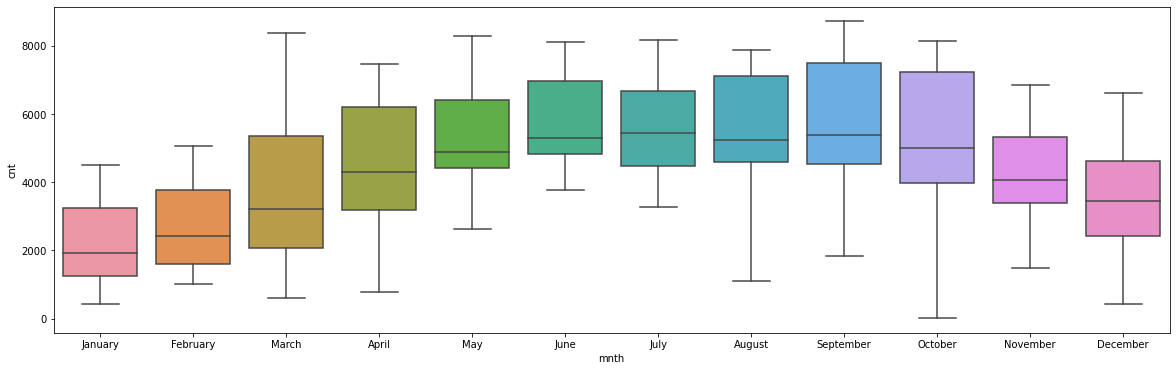

In [34]:
#'mnth' Category
plt.figure(figsize=(20, 6))
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

#### Inference from above: You can see bikes are being used by customers starting 'March' till 'October', reduce from 'November'

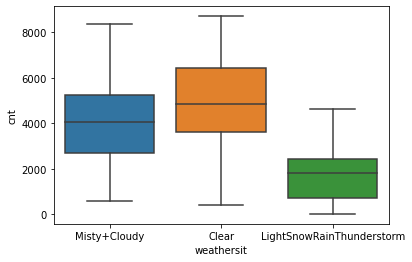

In [35]:
#'weathersit' Category

sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Inference from above: When weather is 'Clear' the usage of bikes is highest compared to other weather conditions

## Step 3: Data Preparation: Create dummy variables for categorical data

### Dummy Variables- Variable one:'season'

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [36]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(df['season'])

In [37]:
# Check what the dataset 'status' looks like
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


#### Now, you don't need three columns. You can drop the `fall` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [38]:
# Let's drop the first column which is 'fall' from status df using 'drop_first = True'

status = pd.get_dummies(df['season'], drop_first = True)

In [39]:
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [40]:
# Add the results to the original df dataframe

df = pd.concat([df, status], axis = 1)

In [41]:
# Drop 'season' as we have created the dummies for it

df.drop(['season'], axis = 1, inplace = True)

In [42]:
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,nonworkingday,spring,summer,winter
0,1,01-01-2018,0,January,0,1,1,Misty+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0
1,2,02-01-2018,0,January,0,2,1,Misty+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0
2,3,03-01-2018,0,January,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0
3,4,04-01-2018,0,January,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0
4,5,05-01-2018,0,January,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0


In [43]:
len(df.columns)

19

### Dummy Variables- Variable Two :'weathersit'
The variable `weathersit` has three unique levels. We need to convert these levels into integer as well.

In [44]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(df['weathersit'])

In [45]:
status.head()

,Clear,LightSnowRainThunderstorm,Misty+Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `Clear` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `Clear`
- `01` will correspond to `Misty+Cloudy`
- `10` will correspond to `LightSnowRainThunderstorm`

In [46]:
# Let's drop the first column 'Clear' from status df using 'drop_first = True'

status = pd.get_dummies(df['weathersit'], drop_first = True)

In [47]:
status.head()

,LightSnowRainThunderstorm,Misty+Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [48]:
# Add the results to the original df dataframe

df = pd.concat([df, status], axis = 1)

In [49]:
# Drop 'weathersit' as we have created the dummies for it

df.drop(['weathersit'], axis = 1, inplace = True)

In [50]:
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,nonworkingday,spring,summer,winter,LightSnowRainThunderstorm,Misty+Cloudy
0,1,01-01-2018,0,January,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0,0,1
1,2,02-01-2018,0,January,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0,0,1
2,3,03-01-2018,0,January,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0,0,0
3,4,04-01-2018,0,January,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0,0,0
4,5,05-01-2018,0,January,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0,0,0


In [51]:
df.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'nonworkingday', 'spring', 'summer', 'winter',
       'LightSnowRainThunderstorm', 'Misty+Cloudy'],
      dtype='object')

In [52]:
len(df.columns)

20

#### Now from the above columns/ features we drop certain these variables as they do not add any value in our regression:
1. instant:index variable
2. dteday: as this is already handled in other variables such as mnth, yr, weekday, workingday etc
3. weekday: From business or management perspective we just need to measure usage of bikes on working days and non workingdays.
4. holiday: From business or management perspective we just need to measure usage of bikes on working days and non workingdays.
5. mnth: From business or management perspective we just need to measure usage of bikes on working days and non workingdays. Also the information of months is already captured in another variable 'season'. From business business perspective we would categorize usage of bikes based on seasons rather than months, thus we will not dummy encode month variable and unnecessarily increase the number of features to start of with.

**Based on our business understanding, there are other variables too which we can drop at this stage, however using VIF values and detecting multicolinearty we will do the same later.**

In [53]:
df.drop(['instant','dteday','weekday','holiday','mnth'], axis = 1, inplace = True)

In [54]:
df.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'nonworkingday', 'spring', 'summer', 'winter',
       'LightSnowRainThunderstorm', 'Misty+Cloudy'],
      dtype='object')

In [55]:
len(df.columns)

15

## Step 4:Splitting the Data into Training and Testing Sets

In [56]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features using using min-max scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [58]:
#Before Scaling
df_train.describe()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,nonworkingday,spring,summer,winter,LightSnowRainThunderstorm,Misty+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.711765,20.102429,23.493909,63.112926,12.831318,837.543137,3648.839216,4486.382353,0.288235,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.453386,7.431169,8.090038,14.156632,5.291832,675.921998,1580.336986,1952.158739,0.453386,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,311.000000,2468.250000,3120.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,20.209597,24.020400,63.437500,12.083182,700.000000,3657.000000,4530.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,26.615847,30.177700,73.250025,15.750879,1076.250000,4841.000000,5973.500000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,3283.000000,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [59]:
df_train.shape

(510, 15)

In [60]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
#Describe train data After scaling
df_train.describe()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,nonworkingday,spring,summer,winter,LightSnowRainThunderstorm,Misty+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.288235,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.453386,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [62]:
#Describe test data after scaling
df_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,nonworkingday,spring,summer,winter,LightSnowRainThunderstorm,Misty+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.360731,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,0.481313,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.481313,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


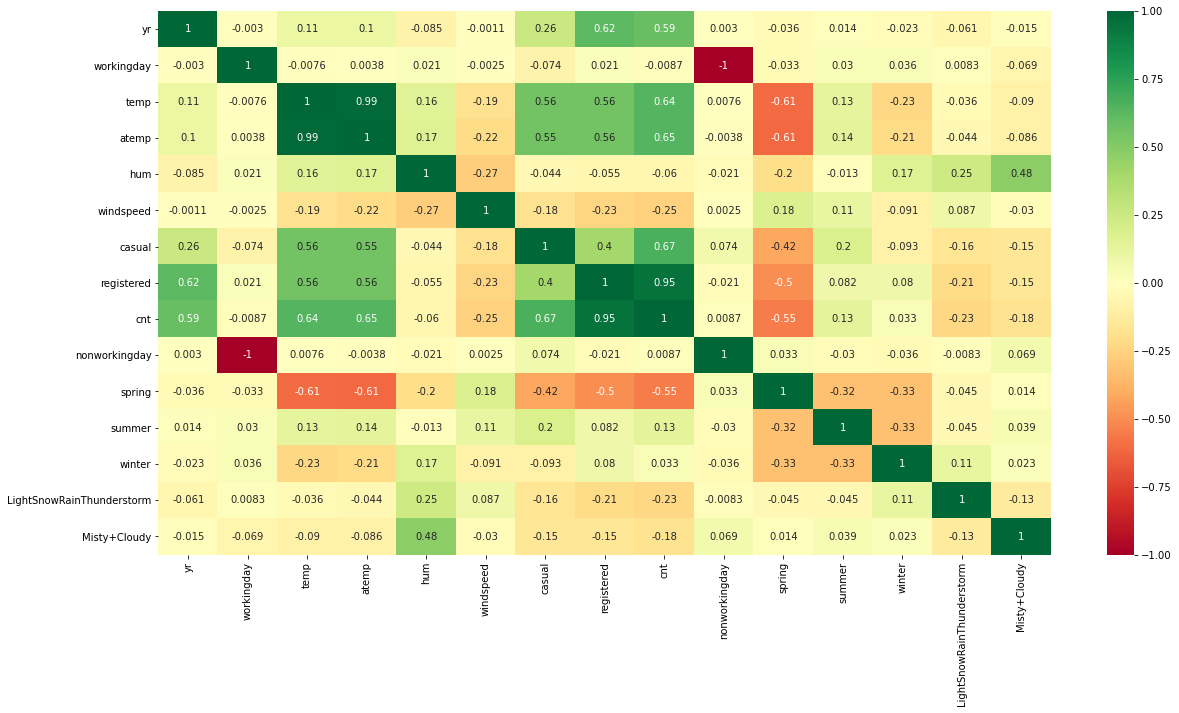

In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

## Step 5: Building a linear model

### Dividing into X and Y on both train and test data sets for the model building¶

In [64]:
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
#Create Copies of these data structures for future use
y_train_orig=y_train
X_train_orig=X_train
y_test_orig=y_test
X_test_orig=X_test

In [66]:
df_train.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'nonworkingday', 'spring', 'summer', 'winter',
       'LightSnowRainThunderstorm', 'Misty+Cloudy'],
      dtype='object')

In [67]:
len(df.columns)

15

In [68]:
# set_trace()

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [69]:
drop_cols=['registered','casual']

We know from business knowledge that `registered` and `casual` are nothing but values that sum up are target variable `cnt`. Thus they should not be taken into account and we need to see which other variables contribute to explain model better and thus explain the number of bike rentals(`cnt`)

In [70]:
X_train = X_train.drop(drop_cols, axis = 1)
X_test = X_test.drop(drop_cols, axis = 1)

In [71]:
print(X_train.columns)

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'nonworkingday', 'spring', 'summer', 'winter',
       'LightSnowRainThunderstorm', 'Misty+Cloudy'],
      dtype='object')


### RFE Recursive feature elimination Process:

In [72]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import RFECV
import sklearn
from sklearn import metrics

In [73]:
#### UDF User Defined Function, we will use this function many times. This can be used for both train and test data by passing
# appropriate actual and predicted values for 'y'
#Returns the mean squared error; we'll take a square root: THE LOWER VALUE, BETTER THE MODEL
def evaluateLRModel(y_actual,y_pred):
    print('R2 Score:',r2_score(y_actual, y_pred))
    print('Mean Squared Error:',np.sqrt(mean_squared_error(y_actual, y_pred)) ) 

In [74]:
bikeshare_LR_RFE_model = LinearRegression().fit(X_train, y_train)
y_train_pred = bikeshare_LR_RFE_model.predict(X_train)
y_test_pred = bikeshare_LR_RFE_model.predict(X_test)

In [75]:
# evaluate model on train data
evaluateLRModel(y_train,y_train_pred)

R2 Score: 0.8239260883114624
Mean Squared Error: 0.09414921884428439


In [76]:
# evaluate model on test data
evaluateLRModel(y_test,y_test_pred)

R2 Score: 0.8034575633264311
Mean Squared Error: 0.0966175028948536


#### Note:
- Point to remember is that the cross-validation score in Linear Regression uses r2 as the default metric to evaluate the model. But you can use other metrics, as per your requirement, from the list of different evaluation metrics from sklearn.metrics.scorers. As shown above.
- cross_val_score in Logistic Regression uses 'accuracy' as default.

In [77]:
#Displays various keys that can be used with cross_val_score()in parameter scoring=""; below we used scoring="r2"
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [78]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(bikeshare_LR_RFE_model, X_train, y_train, cv=5, n_jobs=-1, scoring="r2")

array([0.77577428, 0.83685378, 0.7806923 , 0.81080959, 0.8348075 ])

In [79]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'test'
cross_val_score(bikeshare_LR_RFE_model, X_test, y_test, cv=5, n_jobs=-1, scoring="r2")

array([0.74505905, 0.76419817, 0.78377498, 0.82835795, 0.81148187])

In [80]:
print(X_train.shape) #has 510 rows and 12 columns or features
print(y_train.shape)

(510, 12)
(510,)


#### Using RFECV:

In [81]:
rfecv = RFECV(estimator=bikeshare_LR_RFE_model, cv=4)

#### Hyperparameters for RFECV and their meanings listed below:
- estimator="linear Regression or Logistic Regression Object"
- cv="No of cross validation folds you want to validate the hyperparameters on. If 4, than 75% train and the other 25% on validation. Remember CV works on the already split train data and never sees the test data that is kept aside exclusively for testing the model.
- n_jobs= if set to -1, than if multicore processor, uses all the cores of the processor to speed up the process.
- verbose= if set to 1, outputs the key paramters of the cross validation process.
- scoring= can be accuracy, f1 score, precision, recall and other such model metrics for logistic regression and
- scoring=r2 for Linear Regression

In [82]:
%%time
rfecv.fit(X_train, y_train)

Wall time: 86 ms


RFECV(cv=4, estimator=LinearRegression())

In [83]:
rfecv.grid_scores_

array([0.41243761, 0.55107337, 0.63732908, 0.71208895, 0.73249114,
       0.7670374 , 0.77491779, 0.77663242, 0.79755847, 0.80641614,
       0.8075332 , 0.81117066])

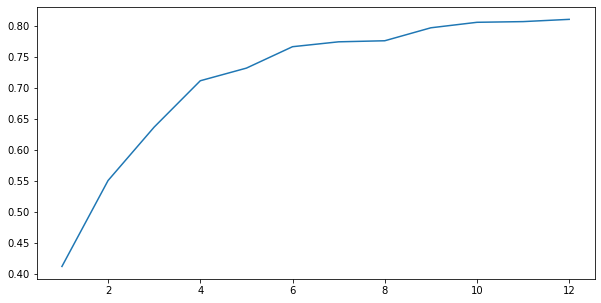

In [84]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

In [85]:
#Number of features to use as suggested by RFECV is given by below code:
rfecv.n_features_

12

#### Inference from above plot:
- RFECV suggested us to use `12` feature as its optimum number to use for no of features. However depending on our domain knowledge and your business requirement and objective we can go ahead with any number.
- If objective is low bias and high variance :more accuracy (inviting more complexity) than can go for more features.
- If objective is high bias and low variance(inviting more simplicity and clear interpretation) than can go for less features.
- Note From above plot and domain knowledge we choose the standard `top 3` features as the optimal number of features as suggested by RFECV

In [86]:
rfe_3 = RFE(estimator=bikeshare_LR_RFE_model, n_features_to_select=3)

In [87]:
%%time
rfe_3.fit(X_train, y_train)

Wall time: 19 ms


RFE(estimator=LinearRegression(), n_features_to_select=3)

In [88]:
best_bikeshare_cols=X_train.columns[rfe_3.support_]
print(best_bikeshare_cols)
print(len(best_bikeshare_cols))

Index(['yr', 'atemp', 'hum'], dtype='object')
3


In [89]:
#UDF:User Defined Function
# Display/Visualize the RFE ranking values for each variable and sort them on RFE Ranking.
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
def displayRfeInfo(df,rfe):
    df_RFE = pd.DataFrame({'column_name': df.columns, 'rfe.support_':rfe.support_,'rfe.ranking_': rfe.ranking_})
    df_RFE.sort_values('rfe.ranking_', ascending=True, inplace=True)
    return df_RFE

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#UDF:User Defined Function
def checkVIF(X):
#     X = X.drop(['const'], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [91]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_train,rfe_3)

,column_name,rfe.support_,rfe.ranking_
0,yr,True,1
3,atemp,True,1
4,hum,True,1
5,windspeed,False,2
2,temp,False,3
10,LightSnowRainThunderstorm,False,4
1,workingday,False,5
6,nonworkingday,False,6
7,spring,False,7
11,Misty+Cloudy,False,8


In [92]:
X_train2 = X_train.loc[:,rfe_3.support_]
X_test2 = X_test.loc[:,rfe_3.support_]

print(X_train2.shape) #This should print 3 i.e no of features supported by rfe
print(X_test2.shape)

(510, 3)
(219, 3)


In [93]:
checkVIF(X_train2)

,Features,VIF
1,atemp,6.49
2,hum,6.42
0,yr,1.96


####  Fit to get new model named as `bikeshare_LR_RFE_model2`

In [94]:
bikeshare_LR_RFE_model2 = LinearRegression().fit(X_train2, y_train)
y_train_pred = bikeshare_LR_RFE_model2.predict(X_train2)
y_test_pred = bikeshare_LR_RFE_model2.predict(X_test2)

In [95]:
# evaluate model on 'train' data
evaluateLRModel(y_train,y_train_pred)

R2 Score: 0.7094987369066356
Mean Squared Error: 0.1209325546315225


In [96]:
# evaluate model on 'test' data:This is what we are interested in. Shortlist this answer
evaluateLRModel(y_test,y_test_pred)

R2 Score: 0.6950365157983396
Mean Squared Error: 0.12035151489899924


#### Shortlisted output of R2. We are interested in this r2 value on test data. Its `0.69`

In [97]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(bikeshare_LR_RFE_model2, X_train2, y_train, cv=5, n_jobs=-1, scoring="r2")

array([0.68752477, 0.71553834, 0.66469393, 0.71004534, 0.7261922 ])

In [98]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'test'
cross_val_score(bikeshare_LR_RFE_model2, X_test2, y_test, cv=5, n_jobs=-1, scoring="r2")

array([0.64525197, 0.65779571, 0.66487086, 0.70560042, 0.62617288])

In [99]:
def getCoeffDf(model,selected_cols):
    model_parameters = list(model.coef_)
    model_parameters.insert(0, model.intercept_)
    model_parameters = [round(x, 3) for x in model_parameters]
#     cols = X_cameraaccessory_test3.columns
    selected_cols = selected_cols.insert(0, "constant")
    coef = list(zip(selected_cols, model_parameters))
    
    coef_df = pd.DataFrame(coef)
    col_rename = {0:'Features',1: 'Coefficients'}
    coef_df = coef_df.rename(columns=col_rename)
#     coef_df = coef_df.iloc[1:,:]
    coef_df = coef_df.loc[coef_df['Coefficients']!=0.0]
    coef_df = coef_df.sort_values(by=['Coefficients'], ascending = False)
    
    return coef_df

In [100]:
best_bikesharing_coef_df=getCoeffDf(bikeshare_LR_RFE_model2,best_bikeshare_cols)
best_bikesharing_coef_df

,Features,Coefficients
2,atemp,0.648
1,yr,0.232
0,constant,0.183
3,hum,-0.185


#### Inference from above:
- atemp, hum, and yr are the top 3 features which explain the model. 
- These 3 features give a r2 of `0.70` on train data.
- These 3 features give a r2 of `0.69` on test data.
- This gives us hands on experience to build our manual model

#### Checking the correlation between final predictor variables

Index(['yr', 'atemp', 'hum'], dtype='object')


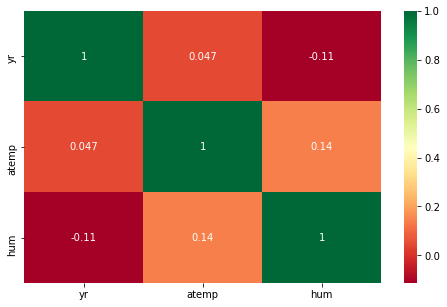

In [101]:
# Figure size
plt.figure(figsize=(8,5))
print(best_bikeshare_cols)
# Heatmap
sns.heatmap(df[best_bikeshare_cols].corr(), cmap="RdYlGn", annot=True)
plt.show()

#### Inference from above plot:
- The final predictors seem to have fairly low correlations.
- Thus this seems a good model, however lets build a manual model and see if we can increase the r2 and adjusted r2 score while keeping the variables/features low to explain the model.

---

## Now building the LR Model manually using statsmodel API and iterations of deletion of features in the model

In [102]:
#Use Copies of these data structures now again to build manual LR model
y_train=y_train_orig
X_train=X_train_orig

In [103]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 11)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [104]:
# Display/Visualize the RFE ranking values for each variable and sort them on RFE Ranking.
df_RFE = pd.DataFrame({'column_name': X_train.columns, 'rfe.support_':rfe.support_,'rfe.ranking_': rfe.ranking_})
df_RFE.sort_values('rfe.ranking_', ascending=False, inplace=True)
df_RFE

,column_name,rfe.support_,rfe.ranking_
10,summer,False,4
13,Misty+Cloudy,False,3
5,windspeed,False,2
0,yr,True,1
1,workingday,True,1
2,temp,True,1
3,atemp,True,1
4,hum,True,1
6,casual,True,1
7,registered,True,1


In [105]:
#variables which rfe suggests us to include in the model:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'casual', 'registered',
       'nonworkingday', 'spring', 'winter', 'LightSnowRainThunderstorm'],
      dtype='object')

In [106]:
#variables which rfe suggests us to exclude in the model:
X_train.columns[~rfe.support_]

Index(['windspeed', 'summer', 'Misty+Cloudy'], dtype='object')

### Building the 1st model using statsmodel, for the detailed statistics

In [107]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [109]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [110]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.761e+31
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:32   Log-Likelihood:                 17388.
No. Observations:                 510   AIC:                        -3.475e+04
Df Residuals:                     499   BIC:                        -3.471e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Drop | Build | Print

#### Manual Algorithm of chossing which variables to drop first:
- 1. High p-value, High VIF: Discard the vars which have these first
- 2. High p-value, Low VIF: Discard the var which has High P-value first as the VIFs of all other vars change after dropping var which High p-value
- 3. Low p-value, High VIF: Discard the var which has High VIF, and than one with Low p-value.
- 4. Low p-value, Low VIF: Keep the variable in the model as its significant.

#### Why is `Value 5` chosen as the threshold to include vars with VIF value lesses than 5 into the model?
VIF= 1/(1-Rsquared)
5=1/(1-Rsquared)
Solving above equantion we derive Rsquared value to be 0.8 which implies a VIF value of 5 corresponds to Rsquared value of 80% which is huge, which means that var is able to explain 80% of the linear correlation with target variable. Thus we choose `value 5` as threshold.
- VIF Value >5 shoudn't be ignored and inspected.
- VIF value >10 is definetly high and the Var can be eliminated/dropped from the model
- if VIF value<5, include the corresponding var/feature into building the LR model

#### p-value Threshold is 0.05.
- 1. If (p<0.05): p-value is low, Reject null hypothesis and treat variable as significant and keep it in the model
- 2. If (p>0.05):p-value is high, Fail to reject null hypothesis and treat variable as insignificant and discard it from model

### 2nd Model: without 'hum'

In [111]:
X_train = X_train_rfe.drop(["hum"], axis = 1)

In [112]:
X_train.columns

Index(['const', 'yr', 'workingday', 'temp', 'atemp', 'casual', 'registered',
       'nonworkingday', 'spring', 'winter', 'LightSnowRainThunderstorm'],
      dtype='object')

In [113]:
# Build 2nd Model without 'hum '
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.309e+04
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:32   Log-Likelihood:                 1576.8
No. Observations:                 510   AIC:                            -3134.
Df Residuals:                     500   BIC:                            -3091.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [114]:
# Dropping const before VIF calculation so that it doesn't influence VIF values for other variables
X_train = X_train.drop(['const'], axis=1)

In [115]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,51.61
3,atemp,49.88
1,workingday,19.84
6,nonworkingday,8.76
5,registered,3.72
7,spring,2.72
0,yr,2.35
8,winter,1.78
4,casual,1.67
9,LightSnowRainThunderstorm,1.20


### 3rd Model: without 'temp'

In [116]:
X_train = X_train.drop(["temp"], axis = 1)

In [117]:
# Build 3rd Model without 'temp'
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.751e+31
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:32   Log-Likelihood:                 17672.
No. Observations:                 510   AIC:                        -3.533e+04
Df Residuals:                     501   BIC:                        -3.529e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [118]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,19.65
5,nonworkingday,8.62
4,registered,3.71
2,atemp,3.31
6,spring,2.68
0,yr,2.35
7,winter,1.68
3,casual,1.67
8,LightSnowRainThunderstorm,1.19


### 4th Model: Without 'LightSnowRainThunderstorm'

In [119]:
X_train = X_train.drop(["LightSnowRainThunderstorm"], axis = 1)

In [120]:
# Build 4th Model without 'workingday'
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.845e+31
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:32   Log-Likelihood:                 17418.
No. Observations:                 510   AIC:                        -3.482e+04
Df Residuals:                     502   BIC:                        -3.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.463e-16   5.47e-17      8.152

In [121]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,19.06
5,nonworkingday,8.37
4,registered,3.26
2,atemp,3.20
6,spring,2.63
0,yr,2.20
7,winter,1.65
3,casual,1.60


### 5th Model: Without 'workingday'

In [122]:
X_train = X_train.drop(["workingday"], axis = 1)

In [123]:
# Build 5th Model without 'spring'
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.471e+31
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:32   Log-Likelihood:                 17696.
No. Observations:                 510   AIC:                        -3.538e+04
Df Residuals:                     502   BIC:                        -3.534e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.029e-16   4.77e-17      8.450

In [124]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered,18.97
1,atemp,13.24
0,yr,4.41
2,casual,4.03
6,winter,1.47
4,nonworkingday,1.40
5,spring,1.24


In [125]:
# set_trace() #breakpoint

### 6th Model: Without 'registered':Notice Rsquared value dropping from 1 to 0.799

In [126]:
X_train = X_train.drop(["registered"], axis = 1)

In [127]:
# Build 6th Model without 'registered'
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     332.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.64e-171
Time:                        19:15:32   Log-Likelihood:                 447.29
No. Observations:                 510   AIC:                            -880.6
Df Residuals:                     503   BIC:                            -850.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1405      0.022      6.281

In [128]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.37
2,casual,4.00
0,yr,2.17
3,nonworkingday,1.40
4,spring,1.24
5,winter,1.23


### 7th Model: Without 'nonworkingday'

In [129]:
X_train = X_train.drop(["nonworkingday"], axis = 1)

In [130]:
# Build 7th Model without 'nonworkingday'
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     400.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.98e-173
Time:                        19:15:32   Log-Likelihood:                 447.27
No. Observations:                 510   AIC:                            -882.5
Df Residuals:                     504   BIC:                            -857.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1399      0.022      6.305      0.0

In [131]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.27
2,casual,3.96
0,yr,2.17
4,winter,1.22
3,spring,1.18


In [132]:

# set_trace() #breakpoint

### 8th Model: Without 'atemp' or 'fall' or 'casual': Without casual R2 value drops to 0.745 from 0.799

In [133]:
X_train = X_train.drop(["casual"], axis = 1)

In [134]:
# Build 8th Model without 'atemp'
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     368.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.19e-148
Time:                        19:15:32   Log-Likelihood:                 386.51
No. Observations:                 510   AIC:                            -763.0
Df Residuals:                     505   BIC:                            -741.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1511      0.025      6.056      0.0

In [135]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,2.03
1,atemp,2.01
3,winter,1.22
2,spring,1.15


In [136]:
# set_trace() #breakpoint

### 9th Model: Without 'winter'

In [137]:
X_train = X_train.drop(["winter"], axis = 1)

In [138]:
# Build 9th Model without 'winter'
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     482.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.58e-148
Time:                        19:15:33   Log-Likelihood:                 383.02
No. Observations:                 510   AIC:                            -758.0
Df Residuals:                     506   BIC:                            -741.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1942      0.019     10.238      0.0

In [139]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.99
1,atemp,1.89
2,spring,1.12


In [140]:
lm.params

const     0.194207
yr        0.241153
atemp     0.450626
spring   -0.140749
dtype: float64

In [141]:
# set_trace() #breakpoint

### 10th Model: Without 'summer'

In [142]:
# X_train = X_train.drop(["summer"], axis = 1)

In [143]:
# # Build 11th Model without 'summer'
# X_train_lm = sm.add_constant(X_train)
# lm = sm.OLS(y_train,X_train_lm).fit() 
# print(lm.summary())

In [144]:
# # Calculate the VIFs for the new model

# vif = pd.DataFrame()
# X = X_train
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [145]:
# set_trace() #breakpoint

In [146]:
# X_train = X_train.drop(["Clear"], axis = 1)

In [147]:
# # Build 11th Model without 'Clear'
# X_train_lm = sm.add_constant(X_train)
# lm = sm.OLS(y_train,X_train_lm).fit() 
# print(lm.summary())

In [148]:
# # Calculate the VIFs for the new model

# vif = pd.DataFrame()
# X = X_train
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

### We will stop here at the 9th Model and take the following `three` variables to explain the variance in the model
1. atemp
2. yr
3. spring

##  Step 6:Residual Analysis of the train data (also known as the error terms)

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [149]:
y_train_pred = lm.predict(X_train_lm)
res = (y_train - y_train_pred)

In [150]:
X_train_lm.columns

Index(['const', 'yr', 'atemp', 'spring'], dtype='object')

Text(0.5, 0, 'Errors')

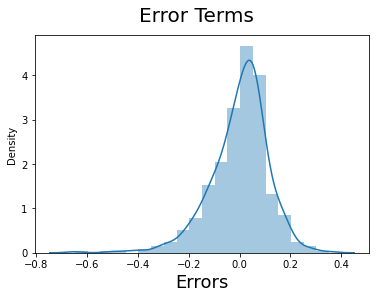

In [151]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

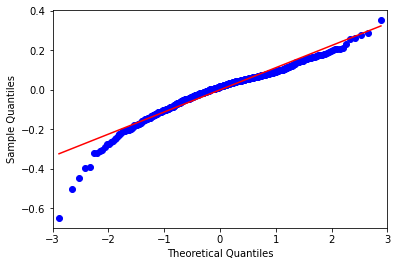

In [152]:
#Verifying the normal distribution of error by QQ-Plot too:
import pylab as py 
sm.qqplot(res, line ='r') 
py.show()

Inference: Normal Distribution of Error Terms: We validated this assumption by drawing a histogram of error terms and obtained a normal distribution curve. Here the normal distribution curve is skewed left(negatively skewed) longer tail towards the left.


#### Looking for patterns in the residuals :Verify independence of error terms.

In [153]:
# plt.scatter(X.fall,res)
# plt.show()

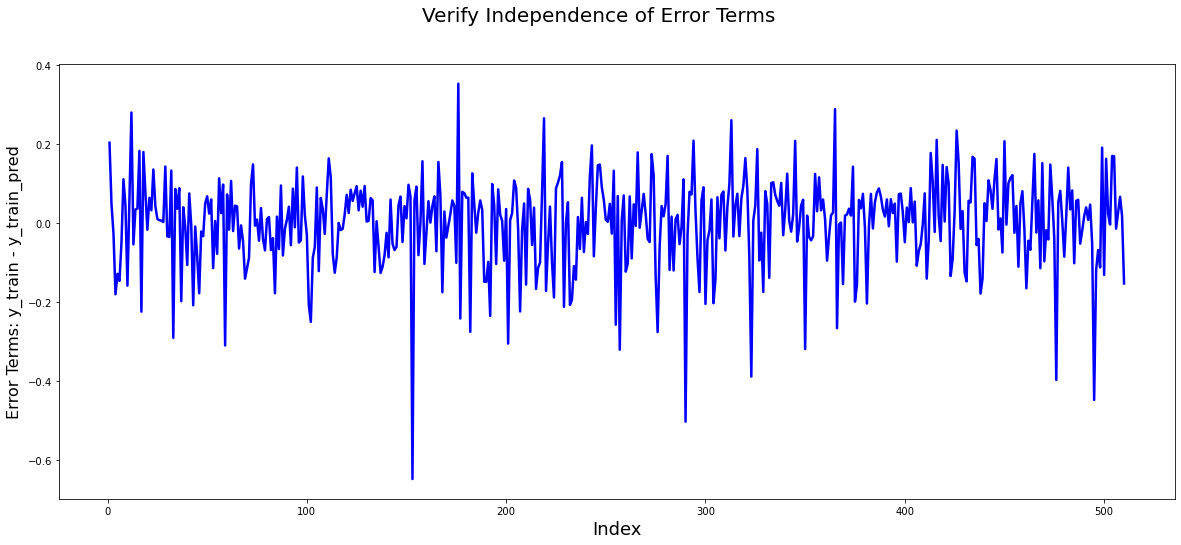

In [154]:
# Error terms
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize=(20, 8))
plt.plot(c,y_train - y_train_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Verify Independence of Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error Terms: y_train - y_train_pred', fontsize=16)                # Y-label
plt.show()

There should be no pattern observed when a line graph is plotted with error terms with the length of error terms. If there are some patterns observed we conclude that the chosen list of features/variables have some issue such as multicollinearity etc. There was a seasonality pattern in the error plot. This pattern in the errors could probably have been explained by some explanatory variable. We validated this assumption by plotting the necessary graph and actually observing independence of error terms and no pattern observed.

#### Verifing constant of error terms:homoscadicity:

In [155]:
#Note the shapes of y_train and y_train_pred are the same, with y_train_pred we have got predicted values of target var:cnt
y_train.shape

(510,)

In [156]:
y_train_pred.shape

(510,)

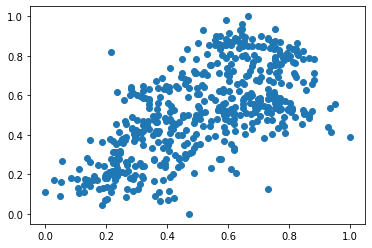

In [157]:
plt.scatter(X.atemp,y_train)
plt.show()

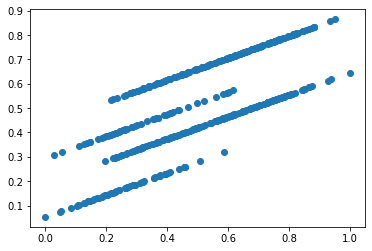

In [158]:
plt.scatter(X.atemp,y_train_pred)
plt.show()

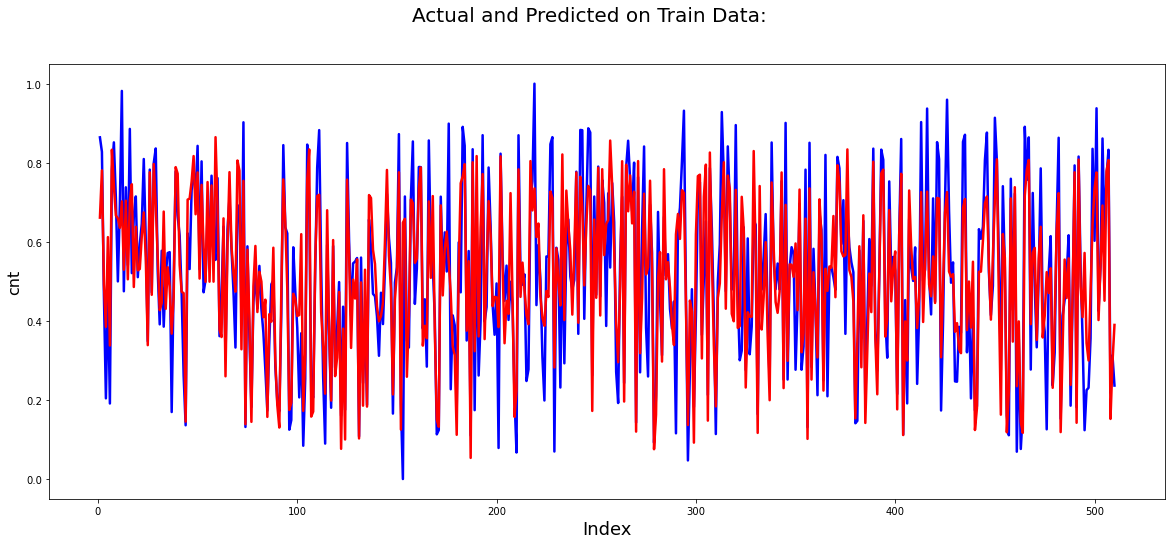

In [159]:
#Actual vs Predicted on 'Train' Data Set:
counter = [i for i in range(1,511,1)]
fig = plt.figure(figsize=(20, 8))
plt.plot(counter,y_train, color="blue", linewidth=2.5, linestyle="-") # Blue=Actual
plt.plot(counter,y_train_pred, color="red",  linewidth=2.5, linestyle="-") # Red=Predicted
fig.suptitle('Actual and Predicted on Train Data:', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16) 
plt.show()

## Step 7: Making Predictions on the test set Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 9th model.

#### Applying the scaling on the test sets
- Already done on line no 63

In [160]:
# num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered','cnt']

# df_test[num_vars] = scaler.transform(df_test[num_vars])

In [161]:
df_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,nonworkingday,spring,summer,winter,LightSnowRainThunderstorm,Misty+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.360731,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,0.481313,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.481313,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test
- Already done above in line no 63

In [162]:
# y_test = df_test.pop('cnt')
# X_test = df_test

In [163]:
#Use Copies of these data structures now again to verify model on test data
y_test=y_test_orig
X_test=X_test_orig

In [164]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [165]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
# X_test_sm[['Clear','Misty+Cloudy','yr','fall','summer','winter']]
X_test_sm = X_test_sm[['const', 'yr', 'atemp', 'spring']]

In [166]:
# Making predictions using the 9th model

y_test_pred = lm.predict(X_test_sm)

In [167]:
y_test_pred.shape

(219,)

In [168]:
y_test.shape

(219,)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values on test data set.

Text(0, 0.5, 'y_pred')

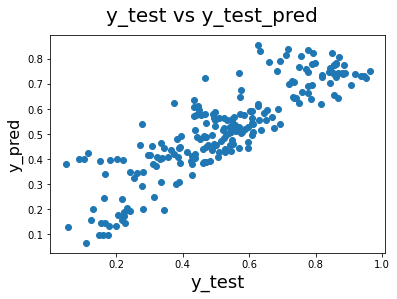

In [169]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [170]:
y_test.shape

(219,)

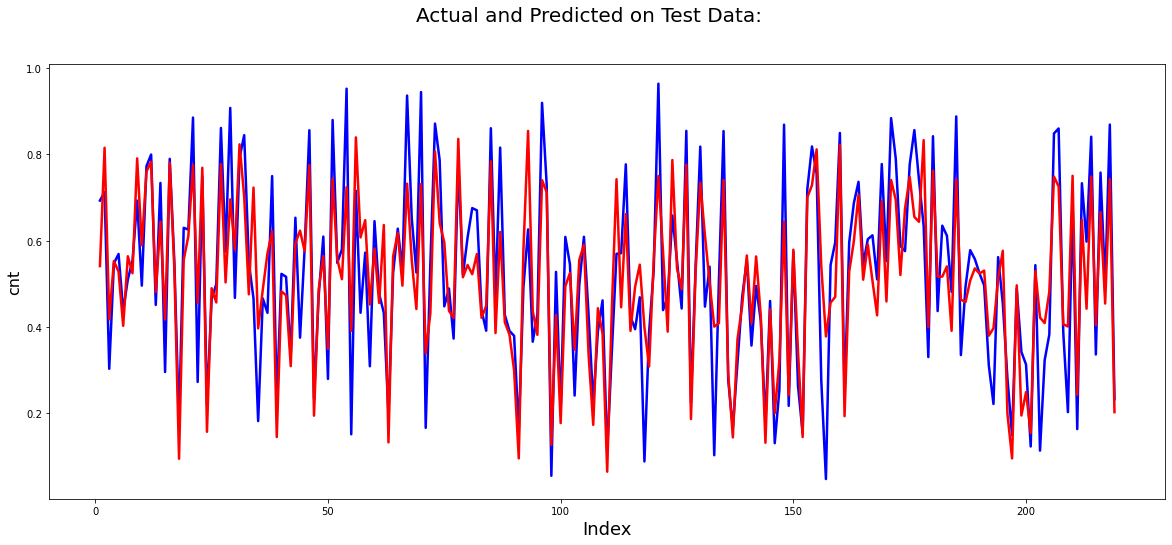

In [171]:
#Actual vs Predicted on 'Test' Data Set:
counter = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(20, 8))
plt.plot(counter,y_test, color="blue", linewidth=2.5, linestyle="-") # Blue=Actual
plt.plot(counter,y_test_pred, color="red",  linewidth=2.5, linestyle="-") #Red=Predicted
fig.suptitle('Actual and Predicted on Test Data:', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16) 
plt.show()

###### Checking the R-squared on the test set

In [172]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [173]:
#R2 on Train data set:
r_squared2 = r2_score(y_train, y_train_pred)
r_squared2

0.7410189016153823

In [174]:
#R2 of Test data set:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7525585021650326

#### Shortlisted Output of R2 obtained on test data is '0.75'

#### Inference: As we can see from the above r2_score test, the r2 score is 0.75 on test data as well, thus we conclude that our chosen model is predicting well.

In [175]:
#Returns the mean squared error; we'll take a square root: THE LOWER VALUE, BETTER THE MODEL
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.10840864314983546

#### Output of MSE obtained on test data is '0.108'
- Lower the MSE better the model: here we have low MSE and thus a good model

#### Checking the correlations between the final predictor variables¶

In [176]:
print(X_train.shape)
print(X_train.columns)

(510, 3)
Index(['yr', 'atemp', 'spring'], dtype='object')


Index(['yr', 'atemp', 'hum'], dtype='object')


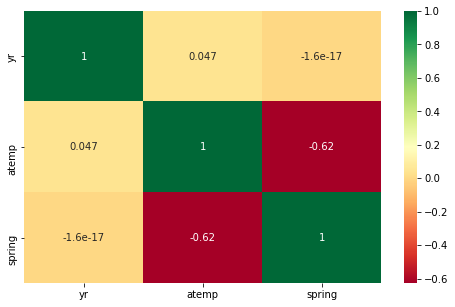

In [177]:
# Figure size
plt.figure(figsize=(8,5))
print(best_bikeshare_cols)
# Heatmap
sns.heatmap(df[X_train.columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

#### Inference from above plot:
- The final predictors seem to have fairly low correlations except atemp and spring

In [178]:
lm.params

const     0.194207
yr        0.241153
atemp     0.450626
spring   -0.140749
dtype: float64

#### The Coefficients obtained are below:
- const=0.194207
- yr=0.241153
- atemp=0.450626
- spring=-0.140749

## Equation of Best Fit Line:

We can see that the equation of our best fitted line is:

$ cnt = 0.241153  \times  yr + 0.450626  \times  atemp + (-0.140749) \times spring + 0.194207 $

# This assignment is submitted by Achal Kagwad
Thank you! Upgrad and IITB team: It was a good learning assignment!:)

# Tips by Sourabh Kalkar Live TA on LR Assignment BoomBikes Usage in USA:

1. Usage of RFE is subjective. There needs to be sense of busines understanding to use RFE carefully
2. Scaling not required for Target variable, (but done in MLR session for 'price') Also done here for 'cnt'
3. Convert numerical to categorical and than to dummy, you will get 40 variables, use RFE to get to 20
4. One of the seasons more impactuful than the others: such insights are important in model
5. Now if 'mnth' is made into dummies and model reveals that its not adding any value and season is adding more value than you can drop the 'mnth' column completely
6. Concept of Precedence of pvalues and vif. pvalues determines significance of the variable and VIF checks multicollinearity. Remove variables going in same direction. Eg distance in km and distance in metres etc
7. Once pvalue less than `0.05` and VIF<5, now get into feature engineering till ideal R2 is reached.
8. Observed VIF for `const` is high; ideally remove const, before running VIF, thus it won't influence other variables.
9. Bias vs Variance:
    - More variables high R2, but model difficult to understand
    - Les variables low R2, but model easy to intrepret
10. If variables are needed from business perspective, but have high VIF, check which vars are multicollinear, i.e which var is explaining other variable and justify you dropping that variable.
11. You may hit a wall, take a break, Start again, Trust yourself and business intuition, It can be tiring but in few iterations will get best one.
12. In this assignment, Month and Season are corelated , model is focusing more on month and season rather than meteriological data(hum, windspeed etc). Here you are askign right questions. Check whether you really need month variable to explain your model.

#### Project Complete
- This Project is done by `Achal Kagwad`
- Contact no: +91-9108302174
- Email Id: achal.kagwad@gmail.com
- Linked in: https://www.linkedin.com/in/achalkagwad/

---